In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn import preprocessing

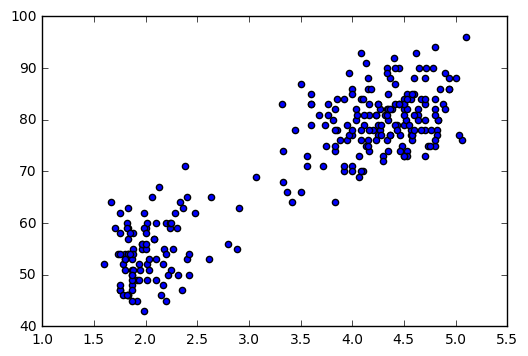

In [2]:
f = np.loadtxt("faithful.dat.txt")
data = np.delete(f, 0, 1)
plt.scatter(data[:,0], data[:,1])

## Expectaction Maximization(EM) Algorithms

In [14]:
class ExpectationMaximization:
    
    def __init__(self, data, k=2):
        # make initial guess about the parameters
        self.max_iteration = 100
        self.data = data
        self.k = k
        self.mean_history = []
        m, n = self.data.shape
        self.mu = np.mat(np.zeros((k,n)))
        self.pi = [1.0/k]*k
        for i in range(n):
            minE = min(data[:,i])
            maxE = max(data[:,i])
            self.mu[:,i] = minE + (maxE - minE) * np.random.rand(k,1)
        self.mu = np.array(self.mu)
        initial_cov = np.dot(data.T, data)/m
        self.cov = np.array([initial_cov] * k)
        
        
    def iterate(self):
        m, n = self.data.shape
        yi = np.zeros((m,self.k))
        cnt = 0
        for _ in range(self.max_iteration):
            self.mean_history.append(np.copy(self.mu))
            cnt += 1
            prev_yi = np.copy(yi)
            # E-step
            for i in range(m):
                denominator = 0
                for j in range(self.k):
                    denominator += self.pi[j] * multivariate_normal.pdf(data[i,:], mean=self.mu[j,:], cov=self.cov[j])
                for j in range(self.k):
                    yi[i,j] = (self.pi[j] * multivariate_normal.pdf(data[i,:], mean=self.mu[j,:], cov=self.cov[j])) / denominator
            # M-step
            if np.allclose(yi, prev_yi): break
            for j in range(self.k):
                numerator = 0
                denominator = 0
                for i in range(m):
                    numerator += yi[i,j] * data[i,:]
                    denominator += yi[i,j]
                self.mu[j] = numerator / denominator
                numerator = 0
                denominator = 0
                for i in range(m):
                    numerator += yi[i,j] * (data[i,:]-self.mu[j])**2
                    denominator += yi[i,j]
                self.cov[j] = numerator / denominator
                self.pi[j] = (np.sum(yi[:,j])) / m
        return cnt
    
    
    def print_history(self):
        plt.figure()
        plt.scatter(data[:,0], data[:,1], s=[50]*len(data), linewidth=0, c='gray')
        a = np.array([m[0,:] for m in self.mean_history])
        b = np.array([m[1,:] for m in self.mean_history])
        prev_x, prev_y = None, None
        for k in a:
            cur_x, cur_y = k[0],k[1]
            if prev_x and prev_y:
                plt.quiver(prev_x,prev_y,cur_x-prev_x,cur_y-prev_y,scale_units='xy', angles='xy', scale=1, color='g')
            prev_x = cur_x
            prev_y = cur_y
        prev_x, prev_y = None, None
        for k in b:
            cur_x, cur_y = k[0],k[1]
            if prev_x and prev_y:
                plt.quiver(prev_x,prev_y,cur_x-prev_x,cur_y-prev_y,scale_units='xy', angles='xy', scale=1, color='r')
            prev_x = cur_x
            prev_y = cur_y
            
    
    def load_first_guess(self, mu1, mu2, cov1, cov2):
        self.mu = np.vstack((mu1,mu2))
        self.cov = np.array([cov1,cov2])
        

take 12 iterations to converge
Plot the trajectories of two mean vectors in 2 dimensions


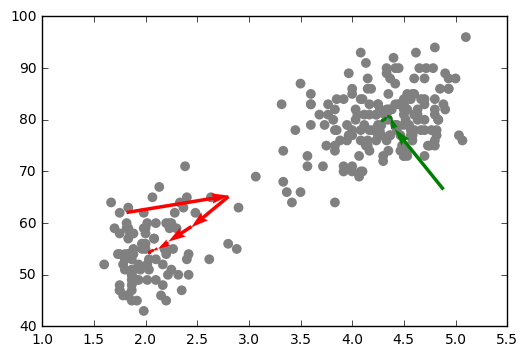

In [15]:
em = ExpectationMaximization(data)
num = em.iterate()
print "take " + str(num) + " iterations to converge"
print "Plot the trajectories of two mean vectors in 2 dimensions"
em.print_history()

In [5]:
iterations = []
for i in range(50):
    em = ExpectationMaximization(data)
    num = em.iterate()
    iterations.append(num)

(array([  1.,   3.,   4.,  10.,   6.,   9.,   8.,   6.,   2.,   1.]),
 array([  9. ,   9.9,  10.8,  11.7,  12.6,  13.5,  14.4,  15.3,  16.2,
         17.1,  18. ]),
 <a list of 10 Patch objects>)

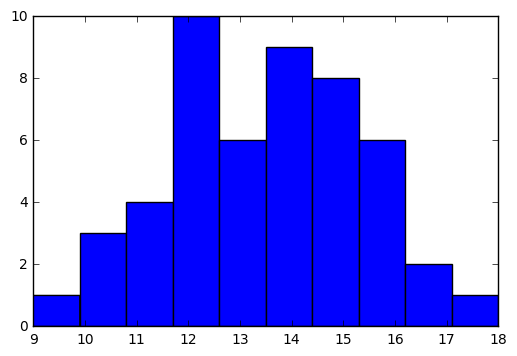

In [6]:
plt.hist(iterations)

In [7]:
def distance(vecA, vecB):
    return np.sqrt(np.sum(np.power(vecA-vecB, 2)))


# use random value to intialize the centroids
def initialCentroids(dataSet, k):
    n = dataSet.shape[1]
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        minE = min(dataSet[:,j])
        maxE = max(dataSet[:,j])
        for i in range(k):
            centroids[i,j] = minE + float(maxE - minE) * np.random.rand()
    return centroids


def kMeans(dataSet, k):
    m = dataSet.shape[0]
    result = np.mat(np.zeros((m,2)))
    centroids = initialCentroids(dataSet, k)
    converged = False
    while not converged:
        converged = True
        for i in range(m):
            minDist, minIndex = np.inf, -1
            for j in range(k):
                dis = distance(centroids[j,:], dataSet[i,:])
                if dis < minDist:
                    minDist, minIndex = dis, j
            if result[i,0] != minIndex: converged = False
            result[i,:] = minIndex, minDist*minDist
        for ci in range(k):
            points = []
            for i in range(m):
                if result[i,0] == ci: points.append(dataSet[i])
            centroids[ci,:] = np.mean(np.array(points), axis = 0)
    return centroids, result

In [19]:
centroids, res = kMeans(preprocessing.normalize(data, axis=0), 2)

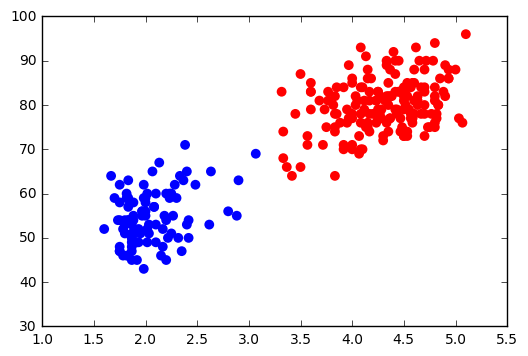

In [20]:
p1, p2 = [], []
for q,t in zip(res,data):
    if q[0,0] == 0: p1.append(t)
    else: p2.append(t)
p1 = np.array(p1)
p2 = np.array(p2)
plt.figure()
plt.scatter(p1[:,0], p1[:,1], s=[50]*len(data), linewidth=0, c='r')
plt.scatter(p2[:,0], p2[:,1], s=[50]*len(data), linewidth=0, c='b')

[  4.29833908  80.05172414] [  2.04863265  54.64285714]
7


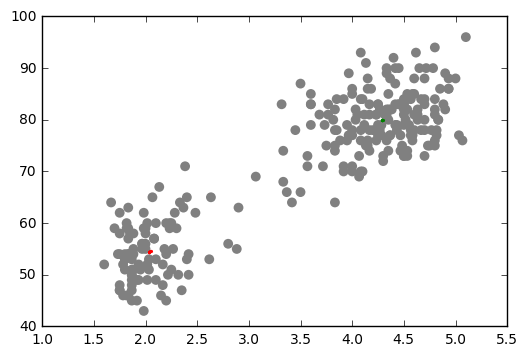

In [21]:
# Consider maximum likelihood for Gaussian
mu1 = np.mean(p1, axis = 0)
mu2 = np.mean(p2, axis = 0)
print mu1, mu2
cov1 = np.dot((p1-mu1).T, p1-mu1)/p1.shape[0]
cov2 = np.dot((p2-mu2).T, p2-mu2)/p2.shape[0]
em = ExpectationMaximization(data)
em.load_first_guess(mu1,mu2,cov1,cov2)
num = em.iterate()
print num
em.print_history()

### Perform kmeans clustering first, make first guess on the parameter based on maximum likelihood.

(array([  0.,   0.,   0.,   0.,   0.,  50.,   0.,   0.,   0.,   0.]),
 array([ 6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5]),
 <a list of 10 Patch objects>)

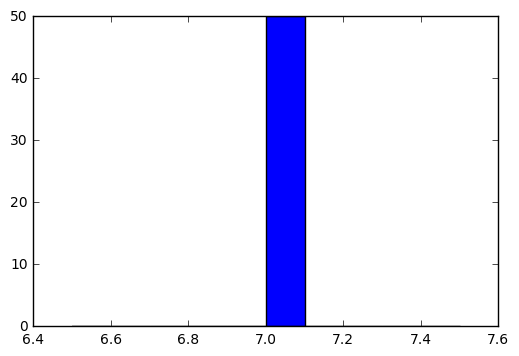

In [28]:
iterations = []
for i in range(50):
    centroids, res = kMeans(preprocessing.normalize(data, axis=0), 2)
    p1, p2 = [], []
    for q,t in zip(res,data):
        if q[0,0] == 0: p1.append(t)
        else: p2.append(t)
    p1 = np.array(p1)
    p2 = np.array(p2)
    mu1 = np.mean(p1, axis = 0)
    mu2 = np.mean(p2, axis = 0)
    cov1 = np.dot((p1-mu1).T, p1-mu1)/p1.shape[0]
    cov2 = np.dot((p2-mu2).T, p2-mu2)/p2.shape[0]
    em = ExpectationMaximization(data)
    em.load_first_guess(mu1,mu2,cov1,cov2)
    num = em.iterate()
    iterations.append(num)
plt.hist(iterations)